# Projeto 1 - Ciência dos Dados

Nome: João Nogueira Roxo da Fonseca

## Pergunta (s) a ser respondida

Com a criação do Mercosul, os países que ingressaram melhoraram sua exportações em comparação aos países que somente se associaram? Decorrente a isso seu PIB também cresceu diante a mesma comparação?

## Explicação da hipótese e mecanismo

   Os países pertencentes ao Mercosul exportaram mais do que países somentes associados a esse bloco, já que o Mercosul tem vantagens para que a exportação aconteça de uma forma mais acentuada, o que não acontece para os países somentes associados pelo fato dos países dos próprios não adotarem a Tec(Tarifa externa comun), uma dos principais incentivos para essa exportação. Sendo assim os paises que pertencem ao bloco Mercosul também terão um maior aumento no pib em relação aos paises associados.
   
Para tirar nota acima de B é preciso indicar uma referência (estudo, artigo científico ou estudo) que embase dizer que a hipótese é crível. Use os [recursos de busca da biblioteca](https://www.insper.edu.br/biblioteca-telles/recursos-de-busca/)

## Bases de dados usadas

Link para o dowload dos dados: https://www.gapminder.org/data/.
As variaveis que foram utilizadas para responder as perguntas foram: Exportação dos países, GDP ou PIB dos países.

## Análise de dados

### Importando Bibliotecas##


In [64]:
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

### Lendo base de dados via EXCEL.

In [65]:
dadospib = pd.read_excel('total_gdp_us_inflation_adjusted.xlsx') #pib
dadosexp = pd.read_excel('bx_gsr_gnfs_cd.xlsx') #exportação

### Trocando indice da tabela.

In [66]:
dadospib_country = dadospib.set_index("country")
dadosexp_country = dadosexp.set_index("country")

### Criando listas dos países membros e associdos.

In [67]:
mercosul = ["Argentina", "Brazil", "Paraguay", "Uruguay", "Venezuela"] #Membros
associados = ["Chile", "Guyana", "Ecuador", "Colombia", "Peru", "Suriname"] #Associados

### Lista de anos à ser observados (desde a criação do bloco).

In [68]:
anos = [1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]

### Criando coluna de membros, associados e resto do mundo.

In [69]:
dadospib_country.loc[:, "MERCOSUL"] = 'Não'
dadospib_country.loc[mercosul, "MERCOSUL"]='Mercosul'
dadospib_country.loc[associados, "MERCOSUL"]='Associados'

dadosexp_country.loc[:,"MERCOSUL"]= 'Não'
dadosexp_country.loc[mercosul, "MERCOSUL"]= 'Mercosul'
dadosexp_country.loc[associados, "MERCOSUL"]= 'Associados'

In [70]:
dados1 = dadospib_country.loc[dadospib_country["MERCOSUL"] == 'Mercosul']
dados1

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,MERCOSUL
country,,,,,,,,,,,,,,,,,,,,,
Argentina,1.160000e+11,1.220000e+11,1.210000e+11,1.140000e+11,1.260000e+11,1.390000e+11,1.380000e+11,1.430000e+11,1.500000e+11,1.640000e+11,...,3.850000e+11,424000000000,4.490000e+11,4.440000e+11,4.550000e+11,4.440000e+11,4.560000e+11,4.480000e+11,4.600000e+11,Mercosul
Brazil,2.470000e+11,2.730000e+11,2.870000e+11,2.890000e+11,3.000000e+11,3.090000e+11,3.220000e+11,3.370000e+11,3.760000e+11,4.130000e+11,...,2.050000e+12,2210000000000,2.300000e+12,2.340000e+12,2.410000e+12,2.420000e+12,2.340000e+12,2.260000e+12,2.280000e+12,Mercosul
Paraguay,1.950000e+09,2.090000e+09,2.150000e+09,2.260000e+09,2.350000e+09,2.500000e+09,2.550000e+09,2.780000e+09,2.910000e+09,3.040000e+09,...,1.770000e+10,20000000000,2.090000e+10,2.060000e+10,2.350000e+10,2.470000e+10,2.540000e+10,2.640000e+10,2.660000e+10,Mercosul
Uruguay,1.390000e+10,1.420000e+10,1.400000e+10,1.400000e+10,1.440000e+10,1.450000e+10,1.500000e+10,1.440000e+10,1.470000e+10,1.560000e+10,...,3.740000e+10,40300000000,4.240000e+10,4.390000e+10,4.590000e+10,4.740000e+10,4.760000e+10,4.840000e+10,4.960000e+10,Mercosul
Venezuela,1.010000e+11,1.050000e+11,1.140000e+11,1.180000e+11,1.310000e+11,1.370000e+11,1.390000e+11,1.430000e+11,1.530000e+11,1.540000e+11,...,3.990000e+11,393000000000,4.100000e+11,4.330000e+11,4.380000e+11,4.210000e+11,NaN,NaN,NaN,Mercosul


In [71]:
dados2 = dadospib_country.loc[dadospib_country["MERCOSUL"] == 'Associados']
dados2

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,MERCOSUL
country,,,,,,,,,,,,,,,,,,,,,
Chile,2.940000e+10,3.090000e+10,3.220000e+10,3.400000e+10,3.490000e+10,3.520000e+10,3.920000e+10,4.060000e+10,4.210000e+10,4.370000e+10,...,2.060000e+11,219000000000,2.320000e+11,2.440000e+11,2.540000e+11,2.590000e+11,2.650000e+11,2.680000e+11,2.720000e+11,Associados
Colombia,3.650000e+10,3.840000e+10,4.050000e+10,4.170000e+10,4.440000e+10,4.580000e+10,4.820000e+10,5.020000e+10,5.340000e+10,5.690000e+10,...,2.760000e+11,287000000000,3.060000e+11,3.180000e+11,3.340000e+11,3.480000e+11,3.590000e+11,3.660000e+11,3.730000e+11,Associados
Ecuador,1.020000e+10,1.040000e+10,1.080000e+10,1.130000e+10,1.210000e+10,1.270000e+10,1.270000e+10,1.320000e+10,1.350000e+10,1.410000e+10,...,6.720000e+10,69600000000,7.500000e+10,7.930000e+10,8.320000e+10,8.630000e+10,8.640000e+10,8.510000e+10,8.760000e+10,Associados
Guyana,9.600000e+08,1.010000e+09,1.020000e+09,8.920000e+08,9.930000e+08,1.100000e+09,1.160000e+09,1.200000e+09,1.220000e+09,1.300000e+09,...,2.180000e+09,2270000000,2.390000e+09,2.520000e+09,2.640000e+09,2.750000e+09,2.830000e+09,2.930000e+09,3.010000e+09,Associados
Peru,2.700000e+10,2.900000e+10,3.190000e+10,3.330000e+10,3.550000e+10,3.750000e+10,4.050000e+10,4.210000e+10,4.220000e+10,4.360000e+10,...,1.360000e+11,148000000000,1.570000e+11,1.660000e+11,1.760000e+11,1.800000e+11,1.860000e+11,1.940000e+11,1.990000e+11,Associados
Suriname,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.150000e+09,4370000000,4.620000e+09,4.750000e+09,4.890000e+09,4.900000e+09,4.770000e+09,4.530000e+09,4.530000e+09,Associados


### Criando coluna somente de associados (afim de facilitar a criação do primeiro gráfico).

In [72]:
dadospib_country.loc[:, "ASSOCIADOS"]=0
dadospib_country.loc[associados, "ASSOCIADOS"]=1

dadosexp_country.loc[:, "ASSOCIADOS"]=0
dadosexp_country.loc[associados, "ASSOCIADOS"]=1

### Graficos comparando PIB, Exportação entre países membros e associados.

In [73]:
dadospib_mercosul = dadospib_country.loc[mercosul]
dadosexp_mercosul = dadosexp_country.loc[mercosul]

dadospib_associados = dadospib_country.loc[associados]
dadosexp_associados = dadosexp_country.loc[associados]

In [74]:
transpor_m = dadospib_mercosul.transpose()
transpor_qnt_m = transpor_m[:-2]
mercosul1 = transpor_qnt_m.loc[(transpor_qnt_m.index>1990) & (transpor_qnt_m.index<2017),:].transpose()
soma_m = mercosul1.sum()


transpor_a = dadospib_associados.transpose()
transpor_qnt_a = transpor_a[:-2]
associados1 = transpor_qnt_a.loc[(transpor_qnt_a.index>1990) & (transpor_qnt_a.index<2017),:].transpose()
soma_a = associados1.sum()

In [75]:
transpor_exp_m = dadosexp_mercosul.transpose()
transpor_qnt_exp_m = transpor_exp_m[:-2]
mercosul2 = transpor_qnt_exp_m.loc[(transpor_qnt_exp_m.index>1990) & (transpor_qnt_exp_m.index<2017),:].transpose()
soma_exp_m = mercosul2.sum()


transpor_exp_a = dadosexp_associados.transpose()
transpor_qnt_exp_a = transpor_exp_a[:-2]
associados2 = transpor_qnt_exp_a.loc[(transpor_qnt_exp_a.index>1990) & (transpor_qnt_exp_a.index<2017),:].transpose()
soma_exp_a = associados2.sum()

#### Comparação PIB, desde a criação do bloco até 2016, de membros e associados.

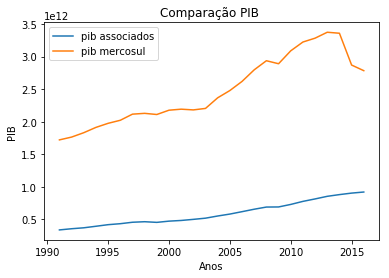

In [76]:
plt.plot(anos, soma_a, label="pib associados")
plt.plot(anos, soma_m, label="pib mercosul")
plt.title("Comparação PIB ")
plt.xlabel("Anos")
plt.ylabel("PIB")
plt.legend()
plt.show()

#### Comparação Exportação, desde a criação do bloco até 2016, de membros associados.

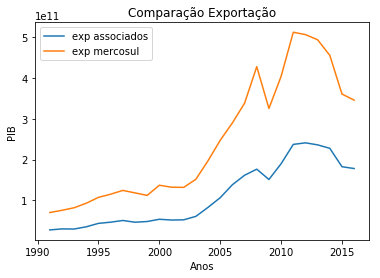

In [77]:
plt.plot(anos, soma_exp_a, label="exp associados")
plt.plot(anos, soma_exp_m, label="exp mercosul")
plt.title("Comparação Exportação")
plt.xlabel("Anos")
plt.ylabel("PIB")
plt.legend()
plt.show()

#### Comparação PIB e Exportação, desde a criação do bloco até 2016, de membros e associados.


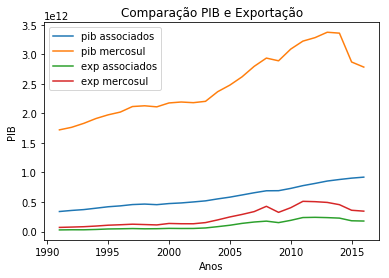

In [78]:
plt.plot(anos, soma_a, label="pib associados")
plt.plot(anos, soma_m, label="pib mercosul")
plt.plot(anos, soma_exp_a, label="exp associados")
plt.plot(anos, soma_exp_m, label="exp mercosul")
plt.title("Comparação PIB e Exportação")
plt.xlabel("Anos")
plt.ylabel("PIB")
plt.legend()
plt.show()

### Plotando gráficos Boxplot

#### Diante a exportação (depois de 10 anos de criação do bloco)

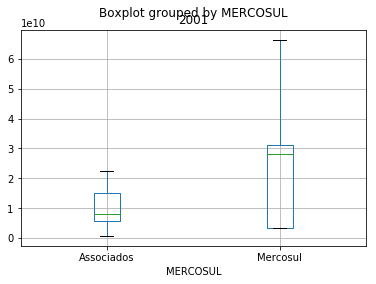

In [81]:
dadosexp_country.loc[ ~(dadosexp_country.MERCOSUL=="Não") ].boxplot(column=2001, by="MERCOSUL")

#### Diante ao PIB (depois de 10 anos de criação do bloco

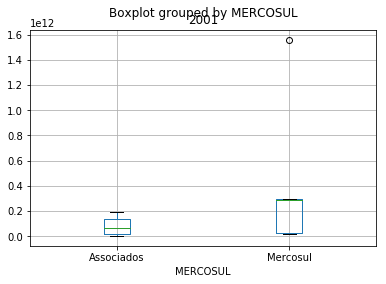

In [82]:
dadospib_country.loc[ ~(dadospib_country.MERCOSUL=="Não") ].boxplot(column=2001, by="MERCOSUL")